Dataset contains information of about 40,000 articles published between 2013 and 2015. The dataset is publically available at UCI Machine Learning Repository.( https://archive.ics.uci.edu/ml/machine-learning-databases/00332). The data comes from website https://mashable.com/ .It consists of 39644 rows. Observations are online news articles with 60 features. The goal is to do analysis and modeling to predict number of shares of an article with the given input parameters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\lakshya_hanshvik\Desktop\Datasets/OnlineNewsPopularity.csv")
data.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
#summary of the dataframe ,excluding the null-counts.
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
timedelta                         39644 non-null float64
n_tokens_title                    39644 non-null float64
n_tokens_content                  39644 non-null float64
n_unique_tokens                   39644 non-null float64
n_non_stop_words                  39644 non-null float64
n_non_stop_unique_tokens          39644 non-null float64
num_hrefs                         39644 non-null float64
num_self_hrefs                    39644 non-null float64
num_imgs                          39644 non-null float64
num_videos                        39644 non-null float64
average_token_length              39644 non-null float64
num_keywords                      39644 non-null float64
data_channel_is_lifestyle         39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus               396

Handling Missing Values : 
The UCI machine learning repository which hosts the current data set has indicated that the data set has no missing values

In [5]:
#total number of NULL values across the whole dataset

data.isnull().sum().sum()

0

In [6]:
#From the available 60 attribute , we can drop 
#    URL - Since every URL is unique for each column
data= data.drop(['url'],axis=1)

In [7]:
#Statistical summary of the numerical attributes
#print(data.describe())
for i in list (data.columns):
    print i
    print(data[i].describe())

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(i)? (<ipython-input-7-7a645b502630>, line 4)

Data Features:

Attribute Information:
     0. url:                           URL of the article
     1. timedelta:                     Days between the article publication and
                                       the dataset acquisition
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the
                                       content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles
                                       published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the
                                       content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in
                                       Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in
                                       Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in
                                       Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral
                                       tokens
    49. rate_negative_words:           Rate of negative words among non-neutral
                                       tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)

The dataset contains 61 attributes out of which 58 attributes are predictive.The target attribute being the number of 'shares' of that particular article  

count of outliers

In [10]:
#list of columsn with outliers

for i in list (data.columns):    
        
    dict_stats = dict(data[i].describe())
    Q1 = round(dict_stats['25%'] , 3)
    Q3 = round(dict_stats['75%'] , 3)
    median = round(dict_stats['50%'] , 3)        
    IQR = Q3-Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    #print('mean =', round(dict_stats['mean'] , 3)),
    #print('std =',round(dict_stats['std'] , 3)),
    #print("median =", median),
    #print("lower quartile =",round(lower_threshold ,3)),
    #print("upper quartile =" ,round(upper_threshold ,3))


    count = 0
    for row  in data[i]:
        if (row < lower_threshold)  or (row > upper_threshold):
            #print(data[data.i==row].index.values.astype(int))
            count += 1
    #if count != 0 : 
    print("no of outliers for {} = {}".format(i,count) )      


no of outliers for timedelta = 0
no of outliers for n_tokens_title = 156
no of outliers for n_tokens_content = 1933
no of outliers for n_unique_tokens = 1600
no of outliers for n_non_stop_words = 39644
no of outliers for n_non_stop_unique_tokens = 1730
no of outliers for num_hrefs = 2169
no of outliers for num_self_hrefs = 2090
no of outliers for num_imgs = 7703
no of outliers for num_videos = 2946
no of outliers for average_token_length = 1676
no of outliers for num_keywords = 51
no of outliers for data_channel_is_lifestyle = 2099
no of outliers for  data_channel_is_entertainment = 7057
no of outliers for data_channel_is_bus = 6258
no of outliers for data_channel_is_socmed = 2323
no of outliers for data_channel_is_tech = 7346
no of outliers for data_channel_is_world = 8427
no of outliers for kw_min_min = 4677
no of outliers for kw_max_min = 3661
no of outliers for kw_avg_min = 2081
no of outliers for kw_min_max = 5063
no of outliers for kw_max_max = 9440
no of outliers for kw_avg_max 

In [111]:
correlation = data.corr()
#print(correlation)
correlation['shares'].sort_values(ascending=False)

shares                            1.000000
kw_avg_avg                        0.135609
kw_max_avg                        0.112222
self_reference_avg_sharess        0.094047
self_reference_min_shares         0.092334
self_reference_max_shares         0.084719
LDA_04                            0.082616
kw_min_avg                        0.076116
kw_avg_min                        0.074350
global_subjectivity               0.072282
global_sentiment_polarity         0.068325
rate_positive_words               0.064136
global_rate_positive_words        0.061868
kw_max_min                        0.061044
num_keywords                      0.057469
num_hrefs                         0.048892
num_imgs                          0.033691
timedelta                         0.033570
max_positive_polarity             0.029352
avg_positive_polarity             0.028459
LDA_00                            0.027288
num_self_hrefs                    0.024854
kw_min_max                        0.023519
n_tokens_co

#attributes with correlation values with Nan value


['data_channel_is_lifestyle',' data_channel_is_entertainment ', 'data_channel_is_bus','data_channel_is_socmed',
 'data_channel_is_tech','data_channel_is_world','kw_max_max',' weekday_is_monday', ' weekday_is_tuesday',
 ' weekday_is_wednesday',' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', 'is_weekend']

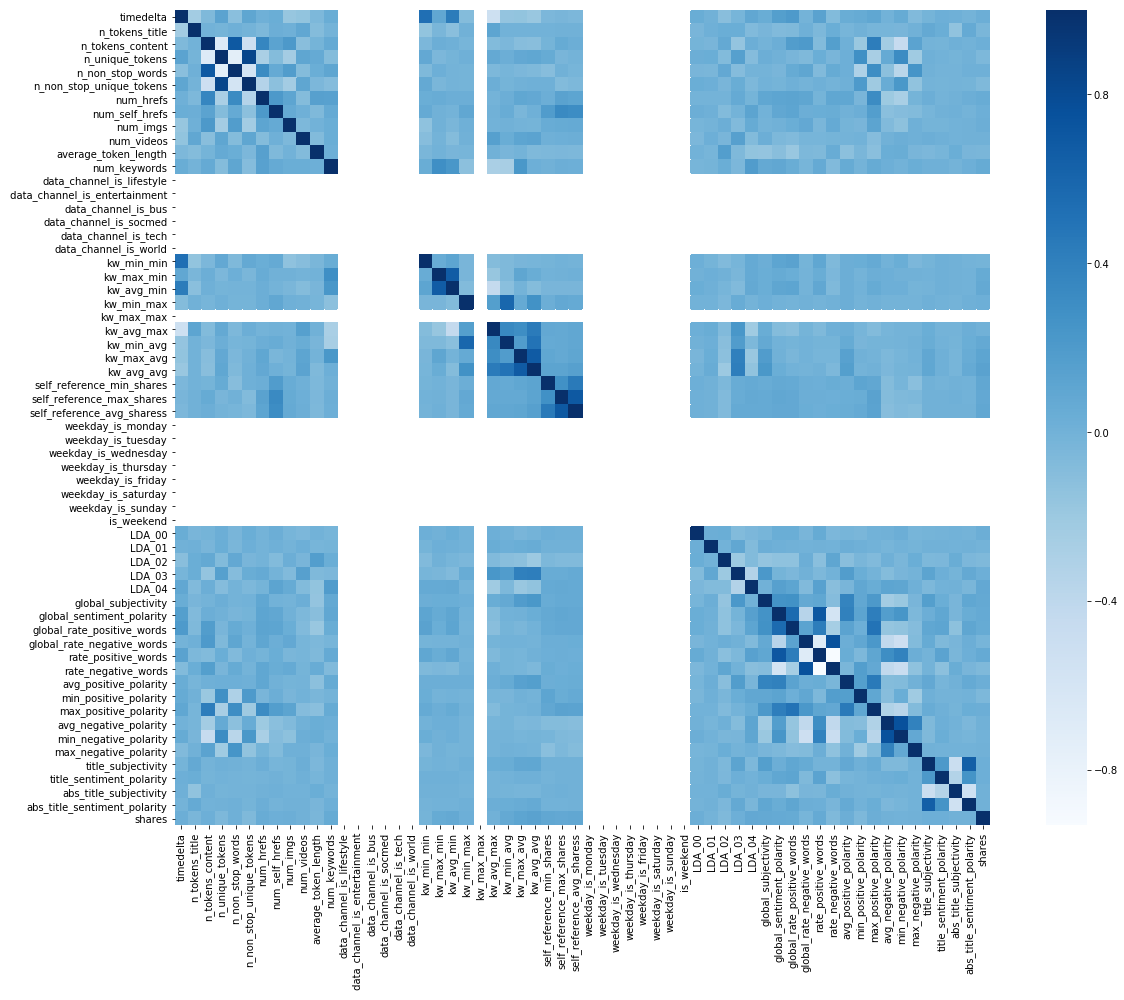

In [129]:
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(correlation, vmax=1, cmap= 'Blues',square=True,ax=ax);

plt.show()

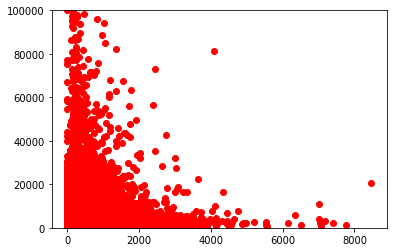

In [10]:
plt.scatter(data['n_tokens_content'], data['shares'],color='r')
plt.ylim(0,100000)
plt.show()